##Data Collection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# load data
# split into training set and testing set
(x_train, x_test), (y_train, y_test)=boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_train[0])
print(x_test.shape)
print(x_test[0])

(404, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
(404,)
15.2


##Data Preprocessing

In [ ]:
# data standardization
mean=x_train.mean(axis=0) # column-based
x_train-=mean

std=x_train.std(axis=0) # column-based
x_train/=std

# for testing set, use the mean and std of training set
y_train-=mean
y_train/=std

print(x_train.shape)
print(x_train[0])

(404, 13)
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


##Build Model

In [ ]:
# build a 3-layer neural network
def build_model():
    model=Sequential()
    model.add(Dense(64, activation='relu', input_shape=(13,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1)) # linear output

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

##K-fold Cross Validation

In [ ]:
# 4-fold cross validation
def k_fold_cross_validation():
    k=4
    num_val_samples=len(x_train)//k # number of data for each fold
    num_epochs=100 # number of iterations
    all_scores=[] # list to store all the scores

    for i in range(k):
        print('Start training {}th fold'.format(i))

        # prepare validation set
        val_data=x_train[i*num_val_samples:(i+1)*num_val_samples]
        val_target=x_test[i*num_val_samples:(i+1)*num_val_samples]

        # prepare training set, axis = 0: concatenate via up and down
        partial_train_data=np.concatenate([x_train[0:i*num_val_samples], x_train[(i+1)*num_val_samples:]], axis=0)
        partial_train_target=np.concatenate([x_test[0:i*num_val_samples], x_test[(i+1)*num_val_samples:]], axis=0)

        # build neural network
        model=build_model()

        # training
        model.fit(partial_train_data, partial_train_target, epochs=num_epochs, batch_size=1, verbose=0)

        # validating
        val_mse, val_mae=model.evaluate(val_data, val_target, verbose=0)

        all_scores.append(val_mae)

    print(all_scores)

k_fold_cross_validation()

Start training 0th fold
Start training 1th fold
Start training 2th fold
Start training 3th fold
[2.075876474380493, 2.791785478591919, 2.7681310176849365, 2.3133673667907715]


In [ ]:
# do it again with more iterations, and this time, we store the MAE of each epoch
all_scores_new=[]
def k_fold_cross_validation_2():
    k=4
    num_val_samples=len(x_train)//k # number of data for each fold
    num_epochs=500 # number of iterations

    for i in range(k):
        print('Start training {}th fold'.format(i))

        # prepare validation set
        val_data=x_train[i*num_val_samples:(i+1)*num_val_samples]
        val_target=x_test[i*num_val_samples:(i+1)*num_val_samples]

        # prepare training set, axis = 0: concatenate via up and down
        partial_train_data=np.concatenate([x_train[0:i*num_val_samples], x_train[(i+1)*num_val_samples:]], axis=0)
        partial_train_target=np.concatenate([x_test[0:i*num_val_samples], x_test[(i+1)*num_val_samples:]], axis=0)

        # build neural network
        model=build_model()

        # training
        history=model.fit(partial_train_data, partial_train_target, epochs=num_epochs, batch_size=1, verbose=0)
        all_scores_new.append(history.history['mae'])

k_fold_cross_validation_2()

Start training 0th fold
Start training 1th fold
Start training 2th fold
Start training 3th fold


In [ ]:
print(all_scores_new)
print(np.array(all_scores_new).shape)

[[11.048595428466797, 3.5153253078460693, 3.003795862197876, 2.788140296936035, 2.70613431930542, 2.574043035507202, 2.4479050636291504, 2.481696128845215, 2.4270801544189453, 2.4276859760284424, 2.3715577125549316, 2.233119487762451, 2.2903454303741455, 2.2825558185577393, 2.2517154216766357, 2.1508877277374268, 2.154684543609619, 2.172452211380005, 2.102724075317383, 2.0438833236694336, 1.9999089241027832, 2.095700740814209, 2.0745065212249756, 2.029557943344116, 2.0321927070617676, 2.0031654834747314, 2.0541422367095947, 2.0035409927368164, 2.043532133102417, 1.9609923362731934, 1.9082047939300537, 1.9157841205596924, 1.9395079612731934, 1.9209649562835693, 1.8839478492736816, 1.8813917636871338, 1.8618065118789673, 1.9220890998840332, 1.8738175630569458, 1.844144582748413, 1.8335750102996826, 1.8197097778320312, 1.7821476459503174, 1.8396542072296143, 1.7706679105758667, 1.814171314239502, 1.7545768022537231, 1.6907105445861816, 1.7585822343826294, 1.7002248764038086, 1.75085067749

In [ ]:
# calculate average MAE for each epoch
average_mae_history=[np.mean([x[i] for x in all_scores_new]) for i in range(500)]

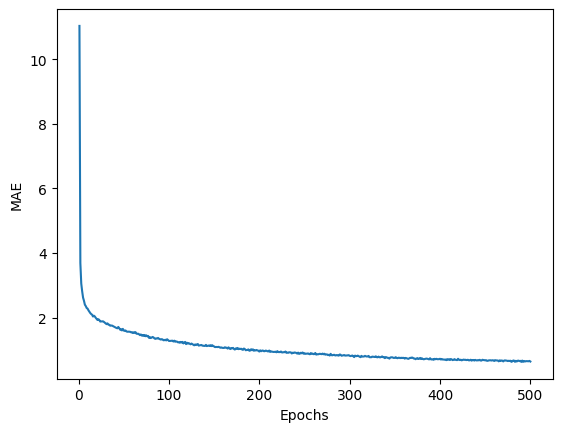

In [ ]:
# show the average MAE history
def show(data):
    plt.plot(range(1, len(data)+1), data)
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.show()

show(average_mae_history)

##Evaluate Model

In [ ]:
model=build_model()
history=model.fit(x_train, x_test, epochs=100, batch_size=16, verbose=1)
test_mse, test_mae=model.evaluate(y_train, y_test)

Epoch 1/100
26/26 [==============================] - 2s 2ms/step - loss: 553.5380 - mae: 21.6734
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 427.2210 - mae: 18.7099
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 217.5412 - mae: 12.5034
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 80.4546 - mae: 6.9318
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 42.6270 - mae: 4.9070
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 27.7077 - mae: 3.7718
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 23.4437 - mae: 3.5015
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 21.3885 - mae: 3.2719
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 19.4997 - mae: 3.1342
Epoch 10/100
26/26 [==============================] - 0s 2ms/step - loss: 18.3551 - mae: 3.0342
Epoch 11/100
26/26 [=======================

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Predict Model

In [ ]:
'''
After continuously training and evaluating, we have a reliable model.
Then, we are able to do prediction to unseen data.
'''

'\nAfter continuously training and evaluating, we have a reliable model.\nThen, we are able to do prediction to unseen data.\n'